In [27]:
import numpy as np
from prettytable import PrettyTable
from matplotlib import pyplot as plt

In [28]:
def show_history(histrory: dict):
    table = PrettyTable()
    for key in histrory.keys():
        table.add_column(key, histrory[key])
    print(table)
    
def plot_history(history: dict):
    # Figure of subplots to show the 1. loss over epcohs  2. k over epochs near target_k=3 3. b over epochs near target_b=2 4. k_gradient over epochs 5. b_gradient over epochs 6. lr over epochs
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    axs[0, 0].plot(history["epoch"], history["loss"])
    axs[0, 0].set_title("Loss over epochs")

    axs[0, 1].plot(history["epoch"], history["k"])
    axs[0, 1].set_title("k over epochs")
    axs[0, 1].axhline(y=3, color='r', linestyle='-', label="target k=3")
    axs[0, 1].legend()

    axs[1, 0].plot(history["epoch"], history["b"])
    axs[1, 0].set_title("b over epochs")
    axs[1, 0].axhline(y=2, color='r', linestyle='-', label="target b=2")
    axs[1, 0].legend()

    axs[1, 1].plot(history["epoch"], history["k_gradient"])
    axs[1, 1].set_title("k_gradient over epochs")

    axs[2, 0].plot(history["epoch"], history["b_gradient"])
    axs[2, 0].set_title("b_gradient over epochs")

    axs[2, 1].plot(history["epoch"], history["lr"])
    axs[2, 1].set_title("lr over epochs")

    plt.tight_layout()
    plt.show()

In [29]:
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "b_gradient": [],
    "lr": [],
}

x = np.array([0, 1, 2, 3, 4, 5])
y = 3 * x + 2

In [30]:
EPOCHS = 150
k = 0.5
b = 0.5
lr = 0.01



In [31]:
for epoch in range(EPOCHS):
    y_pred = k * x + b

    loss = np.mean((y - y_pred) ** 2)

    k_gradient = -2 * np.mean(x * (y - y_pred))
    b_gradient = -2 * np.mean(y - y_pred)

    k = k - k_gradient * lr
    b = b - b_gradient * lr

    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["b_gradient"].append(b_gradient)
    history["lr"].append(lr)

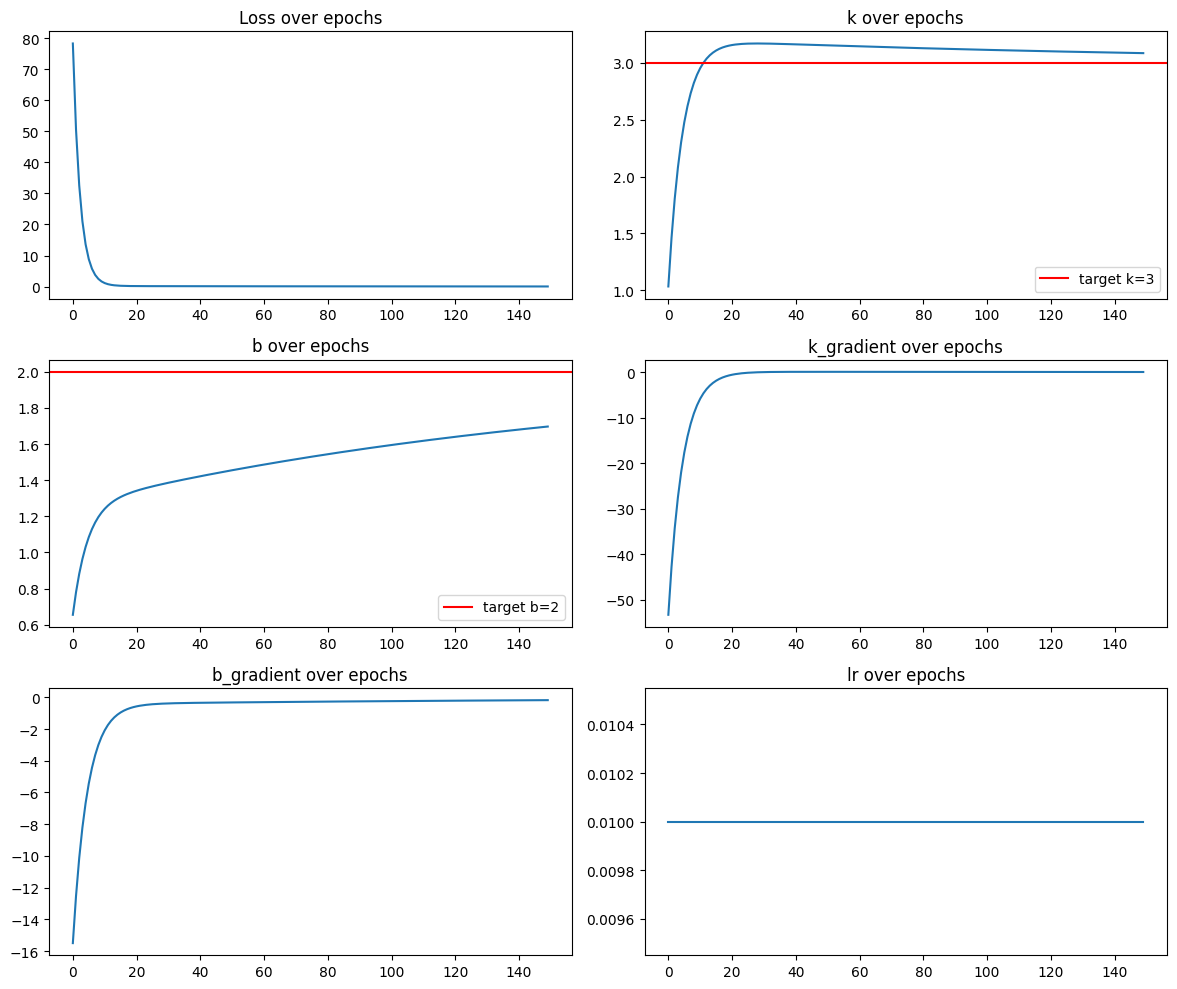

In [32]:
plot_history(history)

In [33]:
show_history(history)

+-------+----------------------+--------------------+--------------------+----------------------+----------------------+------+
| epoch |         loss         |         k          |         b          |      k_gradient      |      b_gradient      |  lr  |
+-------+----------------------+--------------------+--------------------+----------------------+----------------------+------+
|   0   |  78.29166666666667   | 1.0333333333333332 |       0.655        | -53.333333333333336  |        -15.5         | 0.01 |
|   1   |  50.48948796296296   | 1.4611388888888888 | 0.7802333333333333 |  -42.78055555555556  | -12.523333333333333  | 0.01 |
|   2   |  32.580612087752066  | 1.8042517592592593 | 0.8815717222222222 |  -34.31128703703704  | -10.133838888888889  | 0.01 |
|   3   |  21.044302046587287  | 2.0793936839506175 | 0.9637276998148149 | -27.514192469135804  |  -8.215597759259259  | 0.01 |
|   4   |  13.612750970827088  |  2.29998512356893  | 1.0304834616209877 |  -22.05914396183127  |  -6.67